This notebook is by Anastasia Ruzmaikina.

In this notebook we analyze the dataset of around 6500 wines with characeristics such as PH, density, fixed acidity, sulfates, etc. We use the KNN classifier to predict the quality of the wine (graded from 3 to 9) based on the other characteristics.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

First we upload the data set and take a look at it.

In [3]:
wine = pd.read_csv('https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@wine.csv')

In [4]:
wine

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,1
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,1
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,1
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,1


In [5]:
wine.columns

Index(['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'color', 'high_quality'],
      dtype='object')

The column 'Unnamed: 0' does not contain any information and should be dropped.

In [6]:
wine.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
 13  high_quality          6497 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


The 'color' column is categorical and needs to be converted into a numerical column. 

We do a one hot encoding of the 'color' column.

In [8]:
color_dummies = pd.get_dummies(data=wine,columns=['color'])

In [9]:
wine = color_dummies

Now all the columns are numerical.

In [10]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,high_quality,color_red,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1,0


We can calculate the statistics of each column.

In [11]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,high_quality,color_red,color_white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.633061,0.246114,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.482007,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000,0.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000,1.000000


We can plot the histograms of each column.

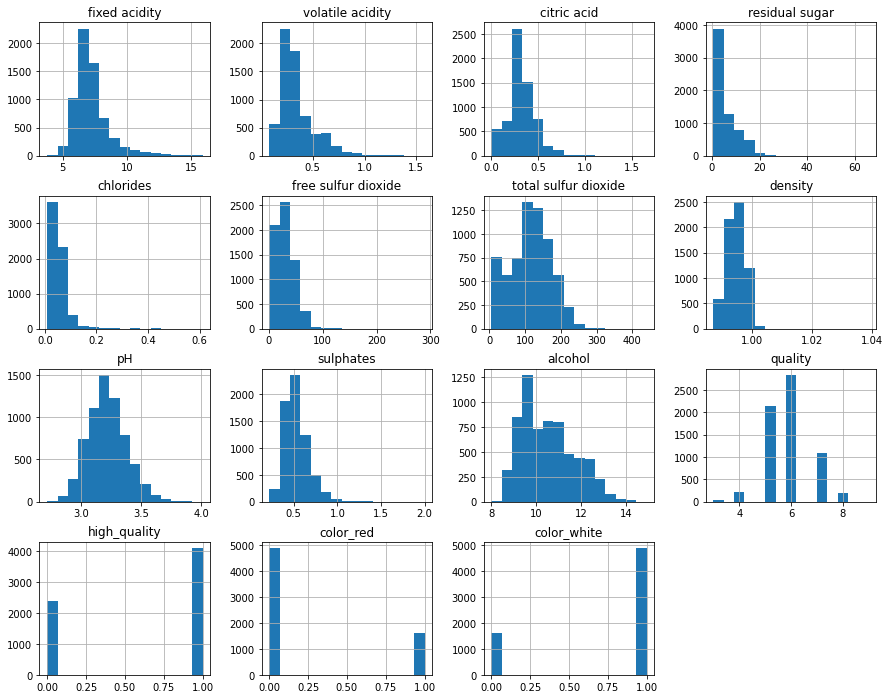

In [12]:
# Check the distribution of all the features

wine.hist(figsize=(15,12),bins = 15)
plt.show()

In [14]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

To run a KNN classifier we need to separate the data into X and y variables.

X variables are all of the columns except the 'quality' and 'high_quality' columns.

y variable is the 'quality' column.

In [15]:
X = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color_red', 'color_white']].values

In [16]:
X[0:5]

array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00, 5.000e+00,
        1.000e+00, 0.000e+00],
       [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
        6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00, 5.000e+00,
        1.000e+00, 0.000e+00],
       [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
        5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00, 5.000e+00,
        1.000e+00, 0.000e+00],
       [1.120e+01, 2.800e-01, 5.600e-01, 1.900e+00, 7.500e-02, 1.700e+01,
        6.000e+01, 9.980e-01, 3.160e+00, 5.800e-01, 9.800e+00, 6.000e+00,
        1.000e+00, 0.000e+00],
       [7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00, 5.000e+00,
        1.000e+00, 0.000e+00]])

In [17]:
y = wine['quality'].values
y[0:5]

array([5, 5, 5, 6, 5])

In order to make sure that none of the X columns dominate the other columns, we run the StandardScaler to rescale each of the X columns.

In [18]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416, -0.93722961,  1.75018984, -1.75018984],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59764007,  1.1979747 ,
        -0.31132009, -0.86246863,  0.70148631, -0.11507303,  0.99957862,
        -0.58006813, -0.93722961,  1.75018984, -1.75018984],
       [ 0.45103572,  2.55330026, -1.91755268, -0.66069923,  1.02669737,
        -0.87476278, -1.09248586,  0.76818761,  0.25811972,  0.79795816,
        -0.58006813, -0.93722961,  1.75018984, -1.75018984],
       [ 3.07381662, -0.36243847,  1.66108525, -0.7447781 ,  0.54141159,
        -0.76207424, -0.98632406,  1.10169412, -0.3638682 ,  0.32751041,
        -0.58006813,  0.20799905,  1.75018984, -1.75018984],
       [ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416, -0.93

In order to train the model, we split our data set into a training set and a test set, where 20% of the data is randomly selected as a test set.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5197, 14) (5197,)
Test set: (1300, 14) (1300,)


In [27]:
from sklearn.neighbors import KNeighborsClassifier

We run a KNN classifier with 4 nearest neighbors.

In [28]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [29]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([6, 5, 5, 7, 5])

We get the accuracy of the KNN classifier for the training data and the test data.

In [30]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9570906292091591
Test set Accuracy:  0.9261538461538461


We try the KNN classifier again, but with 6 nearest neighbors. The test set accuracy score has increased.

In [31]:
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
yhat = neigh.predict(X_test)
yhat[0:5]
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9480469501635559
Test set Accuracy:  0.9338461538461539


We try different values for the number of nearest neighbors (between 1 and 15 nearest neighbors). We print out the array of accuracy scores corresponding to each number of nearest neighbors.

In [32]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.95076923, 0.93230769, 0.93      , 0.92615385, 0.93230769,
       0.93384615, 0.93076923, 0.92615385, 0.92846154, 0.92692308,
       0.92153846, 0.92      , 0.91384615, 0.91      ])

The highest accuracy comes from the KNN classifier with one nearest neighbor:

In [33]:
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

yhat = neigh.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.9507692307692308


Since k=1 corresponds to the overfitted model, we look at the optimal value of k > 1. It is clear that k=6 gives the best accuracy score.

In [34]:
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

yhat = neigh.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9480469501635559
Test set Accuracy:  0.9338461538461539


Note that the test set accuracy score is only 0.015 below the training set accuracy score.

We plot the accuracy of the KNN classifier as a function of k, the number of nearest neighbors.

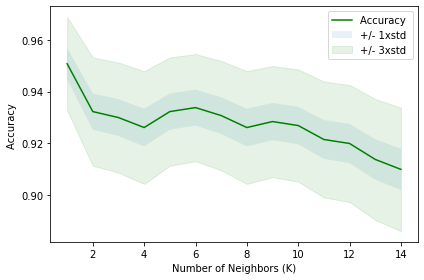

In [35]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

Below is a histogram of the wine 'quality' column.

array([[<AxesSubplot:title={'center':'quality'}>]], dtype=object)

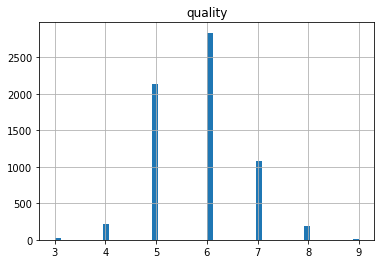

In [36]:
wine.hist(column='quality', bins=50)

Below are the histograms of the test set of actual y values vs predicted y values.

It is clear that the histograms overlap almost perfectly, so the predictions are quite accurate.

(array([  5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  42.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 440.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 566.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        205.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  41.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([3.  , 3.12, 3.24, 3.36, 3.48, 3.6 , 3.72, 3.84, 3.96, 4.08, 4.2 ,
        4.32, 4.44, 4.56, 4.68, 4.8 , 4.92, 5.04, 5.16, 5.28, 5.4 , 5.52,
        5.64, 5.76, 5.88, 6.  , 6.12, 6.24, 6.36, 6.48, 6.6 , 6.72, 6.84,
        6.96, 7.08, 7.2 , 7.32, 7.44, 7.56, 7.68, 7.8 , 7.92, 8.04, 8.16,
        8.28, 8.4 , 8.52, 8.64, 8.76, 8.88, 9.  ]),
 <BarContainer object of 50 artists>)

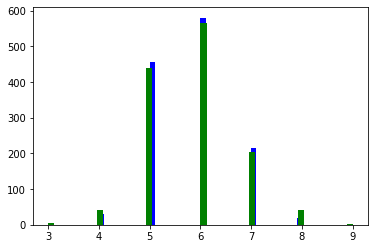

In [37]:
plt.hist(yhat, bins=50, color='blue')
plt.hist(y_test, bins=50, color='green')

In conclusion: we see that the KNN classifier can be very good in predicting the quality of wine. The most accurate prediction comes from using one nearest neighbor. In this case the accuracy is 95%. To avoid overfitting the model, we use six nearest neighbors. In this case, the accuracy score is 93.4%.